# Atividade 8

Restaurar as imagens do dataset de digitais com filtros do domínio da frequência

### Importando as bibliotecas

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

from PIL import Image

%matplotlib inline

### Funções utilizadas

In [86]:
# Furier transform 
def F2(img): ## y = v (N), x = u (M)
    N, M = img.shape
    Fs = np.zeros(img.shape, dtype='complex') 

    for u in range(M):
        for v in range(N):
            soma = 0
            x = np.array(range(M))
            k = np.array([np.exp(- 1j * np.pi * 2 * ((u * x)/M + (v * yi)/N)) for yi in range(N)])
            a = np.sum(img * k) / (M * N)

            Fs[v][u] = a
    return(Fs)


# Furier inverse
def invF(Fs):
    N, M = Fs.shape
    img2 = np.zeros(Fs.shape) 

    for x in range(M):
        for y in range(N):
            soma = 0
            u = np.array(range(M))
            v = np.array(range(N))
            k = np.array([np.exp(1j * np.pi * 2 * ((u * x)/M + (vi * y)/N)) for vi in v])
            soma = np.sum(Fs * k)

            img2[y,x] = int(soma.real)
    
    return img2

# distance
def dist(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# magnitude Furier
def magnitude(X):
    Imag = np.sqrt((X.real**2) + (X.imag**2))
    
    return Imag

# low-pass butterworth
def butterLP(D, img, n):
    filterB = np.zeros(img.shape)
    rows, cols = img.shape

    for x in range(cols):
        for y in range(rows):
            filterB[y,x] = 1/(1 + (dist((y,x), (rows/2, cols/2))/D)**(2*n))
    return filterB

# high-pass butterworth
def butterHP(D, img, n):
    filterB = np.zeros(img.shape)
    rows, cols = img.shape

    for x in range(cols):
        for y in range(rows):
            filterB[y,x] = 1 - 1/(1 + (dist((y, x), (rows/2, cols/2))/D)**(2*n))
    return filterB

# low-pass gaussian
def gaussLP(D, img):
    filterG = np.zeros(img.shape)
    rows, cols = img.shape

    for x in range(cols):
        for y in range(rows):
            filterG[y,x] = np.exp(((-dist((y, x), (rows/2, cols/2))**2)/(2*(D**2))))
    return filterG

# high-pass gaussian
def gaussHP(D, img):
    filterG = np.zeros(img.shape)
    rows, cols = img.shape

    for x in range(cols):
        for y in range(rows):
            filterG[y,x] = 1 - np.exp(((-dist((y, x), (rows/2, cols/2))**2)/(2*(D**2))))
    return filterG

### Principal

Time = 309.31390929222107


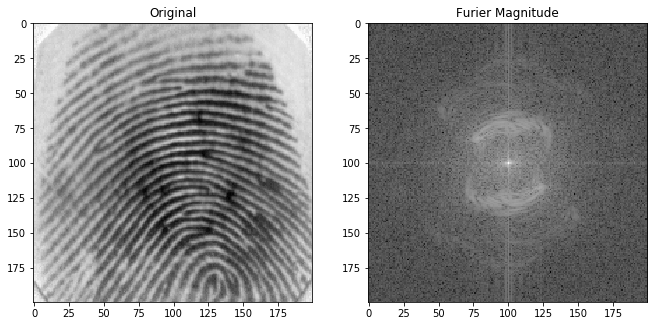

In [87]:
# read image
img = cv2.imread('test images/Fingerprint/101_1.tif', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize=(200, 200), interpolation=cv2.INTER_CUBIC)

start_time = time.time()
signal_furier = F2(img)
print("Time = %s" % (time.time() - start_time))

# Shift signal
signal_shift = np.fft.fftshift(signal_furier)

# get magnitude
Imag = magnitude(signal_shift)

# Logarithm
ImagL = 20*np.log(Imag)


fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(11)

fig.add_subplot(1,2,1, title='Original')
plt.imshow(img, cmap='gray')

fig.add_subplot(1,2,2, title='Furier Magnitude')
plt.imshow(ImagL, cmap='gray')


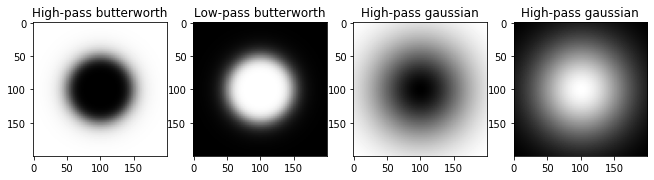

In [90]:
# get mask high-pass and low-pass butterworth
mask_bh = butterHP(50, img, 4)
mask_bl = butterLP(50, img, 4)

# get mask high-pass and low-pass gaussian
mask_gh = gaussHP(50, img)
mask_gl = gaussLP(50, img)

fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(11)

fig.add_subplot(1,4,1, title='High-pass butterworth')
plt.imshow(mask_bh, cmap='gray')

fig.add_subplot(1,4,2, title='Low-pass butterworth')
plt.imshow(mask_bl, cmap='gray')

fig.add_subplot(1,4,3, title='High-pass gaussian')
plt.imshow(mask_gh, cmap='gray')

fig.add_subplot(1,4,4, title='High-pass gaussian')
plt.imshow(mask_gl, cmap='gray')

C:\Users\danil\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
C:\Users\danil\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


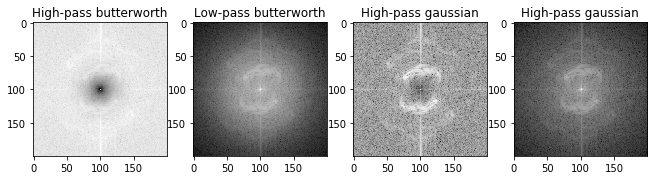

In [91]:
# apllying filters
shiftF_bh = mask_bh * signal_shift
shiftF_bl = mask_bl * signal_shift

shiftF_gh = mask_gh * signal_shift
shiftF_gl = mask_gl * signal_shift


# get magnitude
Imag_bh = magnitude(shiftF_bh)
Imag_bl = magnitude(shiftF_bl)

Imag_gh = magnitude(shiftF_gh)
Imag_gl = magnitude(shiftF_gl)

# Logarithm transformation
ImagL_bh = 20*np.log(Imag_bh)
ImagL_bl = 20*np.log(Imag_bl)

ImagL_gh = 20*np.log(Imag_gh)
ImagL_gl = 20*np.log(Imag_gl)

fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(11)

fig.add_subplot(1,4,1, title='High-pass butterworth')
plt.imshow(ImagL_bh, cmap='gray')

fig.add_subplot(1,4,2, title='Low-pass butterworth')
plt.imshow(ImagL_bl, cmap='gray')

fig.add_subplot(1,4,3, title='High-pass gaussian')
plt.imshow(ImagL_gh, cmap='gray')

fig.add_subplot(1,4,4, title='High-pass gaussian')
plt.imshow(ImagL_gl, cmap='gray')

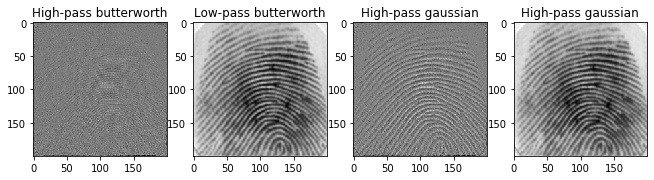

In [92]:
# remove the shift
signalF_bh = np.fft.ifftshift(shiftF_bh)
signalF_bl = np.fft.ifftshift(shiftF_bl)

signalF_gh = np.fft.ifftshift(shiftF_gh)
signalF_gl = np.fft.ifftshift(shiftF_gl)
    
# furier invese
imgOut_bh = invF(signalF_bh)
imgOut_bl = invF(signalF_bl)

imgOut_gh = invF(signalF_gh)
imgOut_gl = invF(signalF_gl)

fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(11)

fig.add_subplot(1,4,1, title='High-pass butterworth')
plt.imshow(imgOut_bh, cmap='gray')

fig.add_subplot(1,4,2, title='Low-pass butterworth')
plt.imshow(imgOut_bl, cmap='gray')

fig.add_subplot(1,4,3, title='High-pass gaussian')
plt.imshow(imgOut_gh, cmap='gray')

fig.add_subplot(1,4,4, title='High-pass gaussian')
plt.imshow(imgOut_gl, cmap='gray')